In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.inspection import DecisionBoundaryDisplay

## For Classification

In [43]:
iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)  # features as columns
df['Target'] = iris.target_names[y]   # add target column

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
## Decision Tree using Entropy

model_1 = DecisionTreeClassifier(criterion='entropy',max_depth=2)
model_1.fit(X_train,y_train)

y_pred = model_1.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [46]:
## Decision Tree using Gini index

model_2 = DecisionTreeClassifier(criterion='gini',max_depth=2)
model_2.fit(X_train,y_train)

y_pred = model_2.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### Decision Boundary for Decision Tree Classification

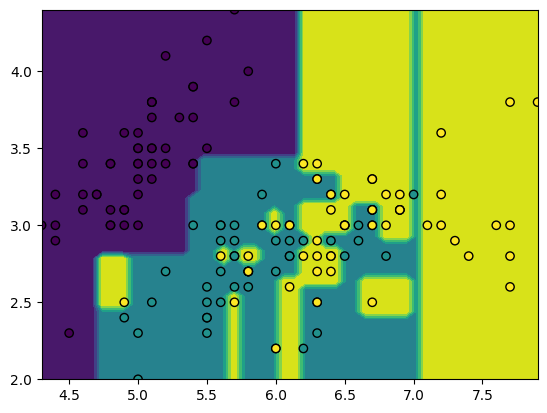

In [47]:
feature_1, feature_2 = np.meshgrid(
    np.linspace(iris.data[:, 0].min(), iris.data[:, 0].max()),
    np.linspace(iris.data[:, 1].min(), iris.data[:, 1].max())
)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
tree = DecisionTreeClassifier().fit(iris.data[:, :2], iris.target)
y_pred = np.reshape(tree.predict(grid), feature_1.shape)
display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred
)
display.plot()
display.ax_.scatter(
    iris.data[:, 0], iris.data[:, 1], c=iris.target, edgecolor="black"
)
plt.show()

## For Regression

In [48]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

diabetes_data = pd.DataFrame(X, columns=diabetes.feature_names)  # features as columns

diabetes_data['Diabetes'] = diabetes.target
diabetes_data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Diabetes
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [49]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
model_3 = DecisionTreeRegressor(random_state=0)
model_3.fit(X_train,y_train)
y_pred = model_3.predict(X_test)

In [52]:
print(f"Mean squared error : {mean_squared_error(y_test,y_pred)}\nMean absolute error : {mean_absolute_error(y_test,y_pred)}")

Mean squared error : 5838.571428571428
Mean absolute error : 61.203007518796994
